# Microsoft LIDA - AI Fueled Analytics Demo

#### We are going to take a weather dataset from 2019-2020 and perform some exploratory data analysis with the help of LIDA. 

#### Air Quality data is sourced from [this](https://aqicn.org/data-platform/covid19/) real-time World Air Quality Index. I have used this data in an [earlier project](https://github.com/divijkulshrestha/lockdown-air-quality-data-analysis/tree/master) to visualize the impact of the COVID lockdown on air pollution levels in Delhi.

In [1]:
# read the dataset
import pandas as pd

df = pd.read_csv('final_dataset.csv')
df_delhi.head()

,Date,Country,City,Specie,Count,Min,Max,Median,Variance
0,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
2,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
3,2019-01-07,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
4,2019-01-10,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97


In [31]:
df_delhi = df.loc[(df['Specie'] == 'pm25')&(df['City']=='Delhi')]
df_delhi.head(10)

,Date,Country,City,Specie,Count,Min,Max,Median,Variance
58264,2019-01-04,IN,Delhi,pm25,688,77.0,720.0,289.0,81576.30
58265,2019-02-16,IN,Delhi,pm25,719,91.0,318.0,182.0,2475.03
58266,2019-03-12,IN,Delhi,pm25,701,9.0,207.0,149.0,11851.10
58267,2019-01-14,IN,Delhi,pm25,660,59.0,999.0,169.0,70650.10
58268,2019-02-13,IN,Delhi,pm25,724,127.0,474.0,246.0,33809.90
58269,2019-03-16,IN,Delhi,pm25,682,31.0,249.0,154.0,7823.81
58270,2019-03-05,IN,Delhi,pm25,594,64.0,228.0,154.0,9161.48
58271,2019-03-21,IN,Delhi,pm25,620,61.0,470.0,177.0,47437.90
58272,2019-03-23,IN,Delhi,pm25,665,1.0,319.0,135.0,15761.70
58273,2019-01-08,IN,Delhi,pm25,686,119.0,450.0,203.0,25022.80


#### You will notice how the data is not particularly cleaned or sorted. Rather, LIDA will do this processing in the background when it generates visualizations. 

In [19]:
import os
from lida import Manager, TextGenerationConfig , llm  

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

In [20]:
lida = Manager(text_gen = llm("openai", api_key=OPENAI_API_KEY)) 

textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-3.5-turbo", use_cache=True)

In [37]:
# summary is similar to df.describe()
summary = lida.summarize(df_delhi, summary_method="default", textgen_config=textgen_config)  

#### Generate Visualization Goals

In [33]:
goals = lida.goals(summary, n=3, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What is the distribution of Count values in the dataset?

**Visualization:** `Bar chart of Count`

**Rationale:** By visualizing the distribution of Count values, we can understand the range and frequency of pollution levels recorded in the dataset, providing insights into the severity of air quality in the city.



### Goal 1
---
**Question:** How do the Min, Max, and Median values compare for the pollution Specie 'pm25'?

**Visualization:** `Bar chart of Min, Max, and Median for Specie 'pm25'`

**Rationale:** Comparing the Min, Max, and Median values for the 'pm25' pollution Specie can help identify the typical range of pollution levels, the highest recorded levels, and the central tendency of pollution measurements for this specific pollutant.



### Goal 2
---
**Question:** What is the variance distribution of pollution levels recorded in the dataset?

**Visualization:** `Histogram of Variance`

**Rationale:** Analyzing the variance distribution of pollution levels can provide insights into the variability and spread of pollution measurements, indicating the consistency or variability in air quality recordings over time.


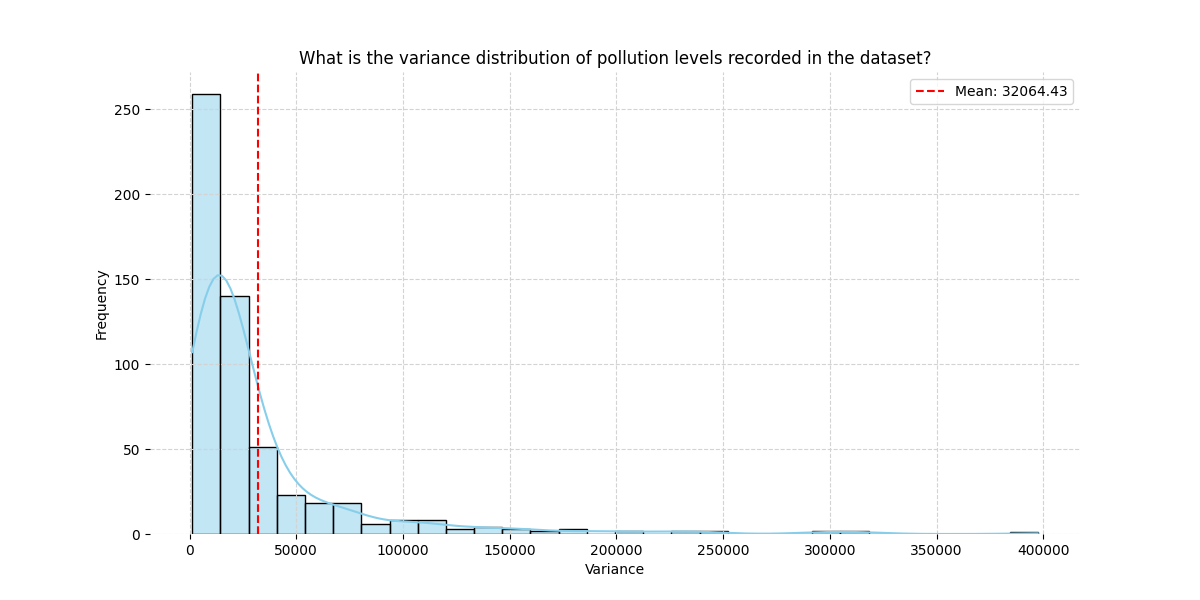

In [35]:
# Example of visualizing the second goal
i = 2
library = "seaborn"
charts = lida.visualize(summary=summary, goal=goals[i], textgen_config=textgen_config, library=library)

# Display the first chart
if charts:
    charts[0]

charts[0]

#### Generate Vizualization via a 'User Query'

In [62]:
user_query = "PM25 median value versus time, year = 2019"
textgen_config = TextGenerationConfig(n=1, temperature=0.5, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config)  


```python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# solution plan
# i. Filter data for year 2019
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data[pd.notna(data['Date'])]
data['Year'] = data['Date'].dt.year
data_2019 = data[data['Year'] == 2019]

# ii. Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Median', data=data_2019, estimator='median', ci=None, color='blue')
plt.axhline(y=data_2019['Median'].mean(), color='red', linestyle='--', label=f'Mean: {data_2019["Median"].mean():.2f}')
plt.legend()
plt.xticks(rotation=45)
plt.title('PM25 median value versus time, year = 2019', wrap=True)

return plt;
```
****
 'return' outside function (<string>, line 20)


C:\Users\Anantk\AppData\Local\Temp\ipykernel_10760\3730925777.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='PM2.5', loc='upper left')


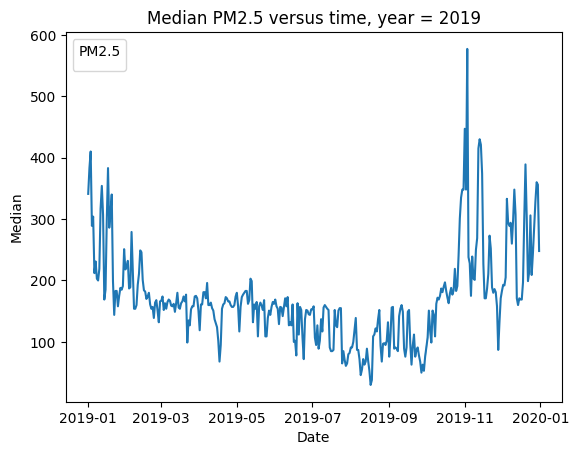

In [61]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# solution plan
# i. Filter df_delhi for the year 2019
df_delhi['Date'] = pd.to_datetime(df_delhi['Date'], errors='coerce')
df_delhi = df_delhi[pd.notna(df_delhi['Date'])]
df_delhi['Year'] = df_delhi['Date'].dt.year
df_delhi_2019 = df_delhi[df_delhi['Year'] == 2019]

# ii. Plot Specie versus time for the year 2019
sns.lineplot(x='Date', y='Median', data=df_delhi_2019)
plt.title('Median PM2.5 versus time, year = 2019')

# iii. Add legend
plt.legend(title='PM2.5', loc='upper left')

plt.show()

#### We can also set Personal Goals based on a persona:

In [72]:
persona = "I want to see the relationship between the median level of PM2.5 pollution, versus time for the year 2019 as a line chart."
personal_goals = lida.goals(summary, n=1, persona=persona, textgen_config=textgen_config)
for goal in personal_goals:
    display(goal)


### Goal 0
---
**Question:** What is the relationship between the median level of PM2.5 pollution and time for the year 2019?

**Visualization:** `Line chart of Date (x-axis) vs. Median (y-axis)`

**Rationale:** By plotting the median PM2.5 pollution levels over time for the year 2019, we can observe any trends or patterns in pollution levels throughout the year, providing insights into seasonal variations or long-term changes in pollution levels.


In [73]:
i = 0
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)

charts = lida.visualize(summary=summary, goal=personal_goals[i], textgen_config=textgen_config, library=library)  
charts[0]

```python
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# solution plan
# i. Convert 'Date' field to datetime type
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data = data[pd.notna(data['Date'])]

# ii. Filter data for the year 2019
data_2019 = data[data['Date'].dt.year == 2019]

# iii. Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Median', data=data_2019, ci=None, color='skyblue')
plt.axvline(x=data_2019['Date'].min(), color='red', linestyle='--', label=f'Min Date: {data_2019["Date"].min().strftime("%Y-%m-%d")}')
plt.axvline(x=data_2019['Date'].max(), color='green', linestyle='--', label=f'Max Date: {data_2019["Date"].max().strftime("%Y-%m-%d")}')
plt.legend()
plt.xticks(rotation=45)
plt.title('What is the relationship between the median level of PM2.5 pollution and time for the year 2019?', wrap=True)

return plt
```
****
 'return' outside function (<string>, line 22)


IndexError: list index out of range

#### The above error is due to deprecated parameters being passed in one of the plotting functions. This shows the code generated by the LLM, in this case gpt-3.5-turbo, will not always be perfect. Generated code depends on the model size and how up to date it is.

#### By removing the erroneous parameter, we can see the code does work -

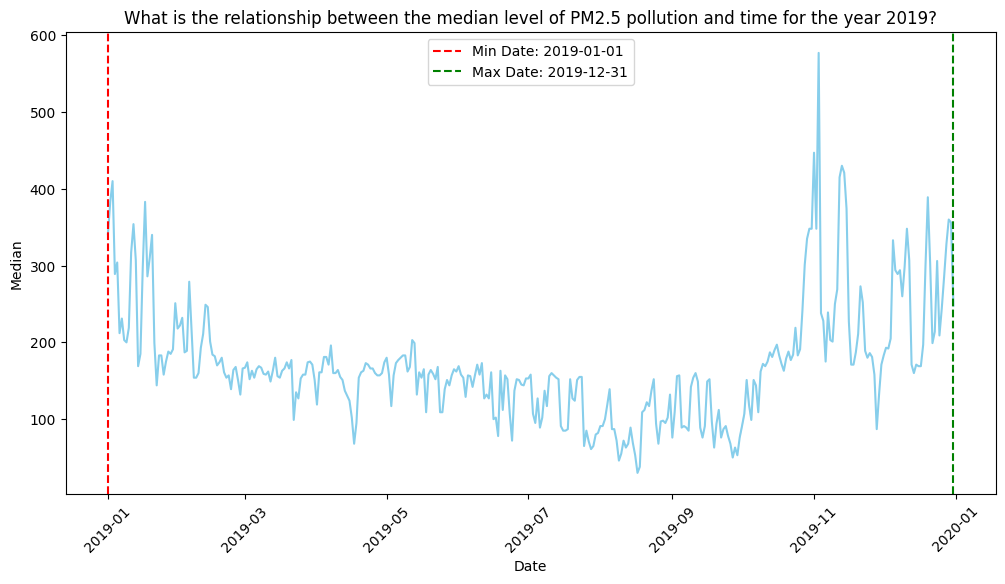

In [77]:
# solution plan
# i. Convert 'Date' field to datetime type
df_delhi['Date'] = pd.to_datetime(df_delhi['Date'], errors='coerce')
df_delhi = df_delhi[pd.notna(df_delhi['Date'])]

# ii. Filter df_delhi for the year 2019
df_delhi_2019 = df_delhi[df_delhi['Date'].dt.year == 2019]

# iii. Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Median', data=df_delhi_2019, color='skyblue')
plt.axvline(x=df_delhi_2019['Date'].min(), color='red', linestyle='--', label=f'Min Date: {df_delhi_2019["Date"].min().strftime("%Y-%m-%d")}')
plt.axvline(x=df_delhi_2019['Date'].max(), color='green', linestyle='--', label=f'Max Date: {df_delhi_2019["Date"].max().strftime("%Y-%m-%d")}')
plt.legend()
plt.xticks(rotation=45)
plt.title('What is the relationship between the median level of PM2.5 pollution and time for the year 2019?', wrap=True)

plt.show()

#### Testing other libraries 


In [94]:
i = 0
library = "altair"
textgen_config = TextGenerationConfig(n=1, temperature=0.5, use_cache=True)

charts = lida.visualize(summary=summary, goal=personal_goals[i], textgen_config=textgen_config, library=library)  
charts[0]

<string>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


import altair as alt
import pandas as pd

def plot(data: pd.DataFrame):
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data = data[pd.notna(data['Date'])]
    
    filtered_data = data[(data['Date'] >= '2019-01-01') & (data['Date'] <= '2019-12-31')]
    
    chart = alt.Chart(filtered_data).mark_line().encode(
        x=alt.X('Date:T', title='Date'),
        y=alt.Y('Median:Q', title='Median PM2.5 Pollution Level'),
        color=alt.Color('Specie:N', legend=alt.Legend(title='Pollution Type')),
        tooltip=['Date:T', 'Median:Q']
    ).properties(
        width=800,
        height=400,
        title='Relationship between Median PM2.5 Pollution Level and Time in 2019'
    )
    
    median_value = filtered_data['Median'].median()
    chart = chart + alt.Chart(filtered_data).mark_rule(color='red').encode(
        y=alt.Y('median_value:Q', title='Median PM2.5 Pollution Level', axis=alt.Axis(titleX=50)),
        tooltip=['median_value:Q']
    ).transform_calculate(

In [97]:
import altair as alt
import pandas as pd

def plot(data: pd.DataFrame):
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    data = data[pd.notna(data['Date'])]

    filtered_data = data[(data['Date'] >= '2019-01-01') & (data['Date'] <= '2019-12-31')]

    median_value = filtered_data['Median'].median()

    # Line chart for PM2.5 pollution level over time
    chart = alt.Chart(filtered_data).mark_line().encode(
        x=alt.X('Date:T', title='Date'),
        y=alt.Y('Median:Q', title='Median PM2.5 Pollution Level'),
        color=alt.Color('Specie:N', legend=alt.Legend(title='Pollution Type')),
        tooltip=['Date:T', 'Median:Q']
    ).properties(
        width=800,
        height=400,
        title='Relationship between Median PM2.5 Pollution Level and Time in 2019'
    )

    # Rule for the median value
    median_rule = alt.Chart(pd.DataFrame({'y': [median_value]})).mark_rule(color='red').encode(
        y='y:Q'
    ).properties(
        title=f'Median Value: {median_value:.2f}'
    )

    # Combine the chart and the median rule
    final_chart = chart + median_rule
    
    return final_chart

plot(df_delhi)


alt.LayerChart(...)

<string>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


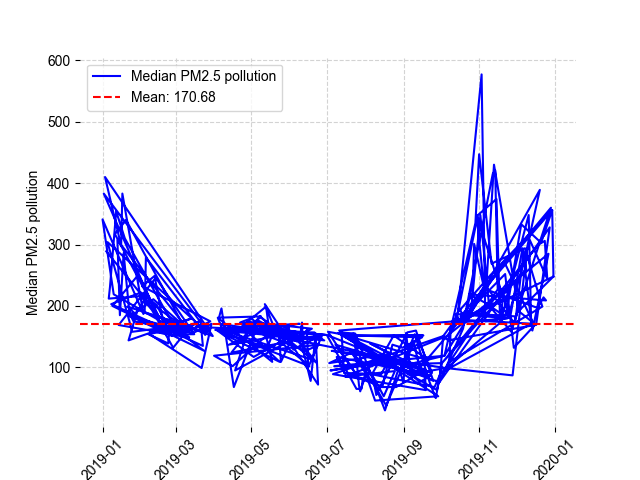

In [98]:
i = 0
library = "matplotlib"
textgen_config = TextGenerationConfig(n=1, temperature=0.5, use_cache=True)

charts = lida.visualize(summary=summary, goal=personal_goals[i], textgen_config=textgen_config, library=library)  
charts[0]

#### Visualization Explaination

In [84]:
code = charts[0].code
display(code)

'import matplotlib.pyplot as plt\nimport pandas as pd\n\n# plan -\ndef plot(data: pd.DataFrame):\n    data[\'Date\'] = pd.to_datetime(data[\'Date\'], errors=\'coerce\')\n    data = data[pd.notna(data[\'Date\'])]\n    \n    data_2019 = data[data[\'Date\'].dt.year == 2019]\n    \n    plt.plot(data_2019[\'Date\'], data_2019[\'Median\'], color=\'blue\', label=\'Median PM2.5 pollution level\')\n    plt.axhline(y=data_2019[\'Median\'].mean(), color=\'red\', linestyle=\'--\', label=f\'Mean: {data_2019["Median"].mean():.2f}\')\n    plt.legend()\n    plt.xlabel(\'Date\')\n    plt.ylabel(\'Median PM2.5 Pollution Level\')\n    plt.xticks(rotation=45)\n    plt.title(\'What is the relationship between the median level of PM2.5 pollution and time for the year 2019?\', wrap=True)\n    return plt;\n\nchart = plot(data)'

In [83]:
explanations = lida.explain(code=code, library=library, textgen_config=textgen_config) 
for row in explanations[0]:
    print(row["section"]," ** ", row["explanation"])

accessibility  **  The code imports the necessary libraries: matplotlib for plotting and pandas for data manipulation.
transformation  **  The code transforms the data by converting the 'Date' column to datetime format, filtering out any rows with missing dates, and creating a subset of data for the year 2019.
visualization  **  The code visualizes the data by plotting the median PM2.5 pollution levels against dates for the year 2019. It also includes a horizontal line representing the mean pollution level, labels, axis titles, and a title to provide insights into the relationship between pollution levels and time.


#### Refine Vizualization with Natural Language

<string>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


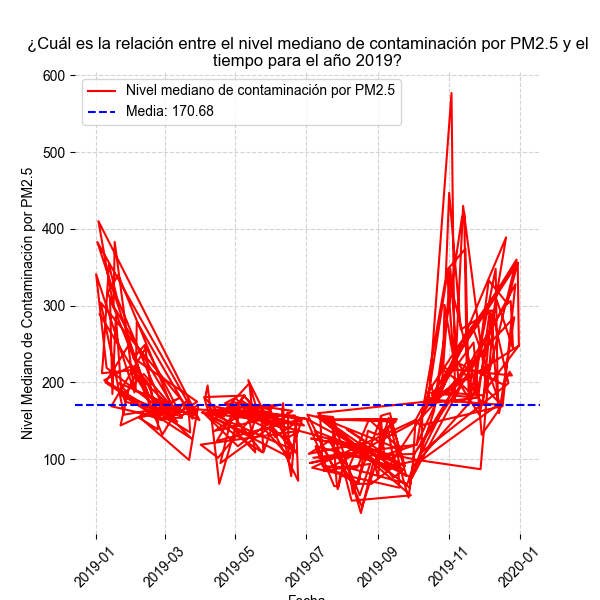

In [85]:
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions = ["make the chart height and width equal", "change the color of the chart to red", "translate the chart to spanish"]
edited_charts = lida.edit(code=code,  summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
edited_charts[0]

#### Self-Evaluation

In [102]:
code = charts[0].code
evaluations = lida.evaluate(code=code,  goal=goals[i], textgen_config=textgen_config, library=library)[0] 
for eval in evaluations:
    print(eval["dimension"], "Score" ,eval["score"], "/ 10")
    print("\t", eval["rationale"][:200])
    print("\t**********************************")

bugs Score 8 / 10
	 The code does not have any syntax errors or logical bugs. However, there is a potential improvement in the data filtering logic.
	**********************************
transformation Score 6 / 10
	 The data is transformed by converting the 'Date' column to datetime and filtering out rows with missing dates. However, further aggregation or grouping of data based on the specified goal is missing.
	**********************************
compliance Score 4 / 10
	 The code does not comply well with the specified goal of visualizing the distribution of 'Count' values in the dataset. Instead, it focuses on plotting the 'Median PM2.5 pollution' over time.
	**********************************
type Score 3 / 10
	 The chosen line plot type is not appropriate for visualizing the distribution of 'Count' values. A histogram or bar plot would be more effective for this purpose.
	**********************************
encoding Score 7 / 10
	 The data is encoded appropriately with 'Date' on the

#### Visualization Recommendations

Recommended 1 charts


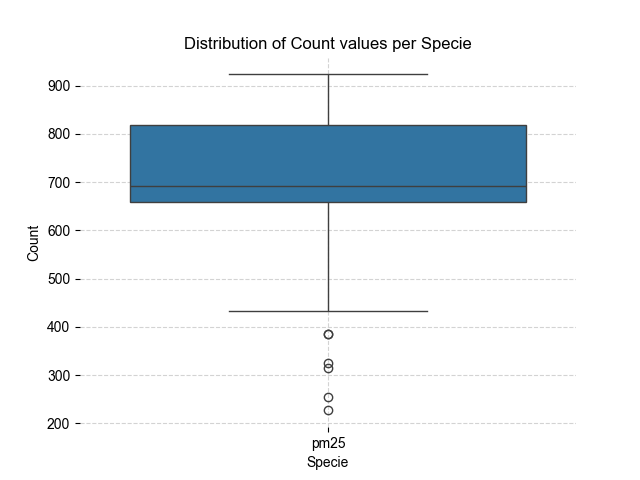

In [103]:
textgen_config = TextGenerationConfig(n=2, temperature=0.2, use_cache=True)
recommended_charts =  lida.recommend(code=code, summary=summary, n=2,  textgen_config=textgen_config)

print(f"Recommended {len(recommended_charts)} charts")
for chart in recommended_charts:
    display(chart) 